In [ ]:
import pandas as pd

df = pd.read_csv('enjoysport.csv')
print("Loaded Data:\n", df)




Loaded Data:
      sky airtemp humidity    wind water forcast enjoysport
0  sunny    warm   normal  strong  warm    same        yes
1  sunny    warm     high  strong  warm    same        yes
2  rainy    cold     high  strong  warm  change         no
3  sunny    warm     high  strong  cool  change        yes


In [ ]:
import numpy as np

def entropy(y):
    value, counts = np.unique(y, return_counts=True)
    entropy = -np.sum([(counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(value))])
    return entropy

In [ ]:
def information_gain(df, feature, target="enjoysport"):
    total_entropy = entropy(df[target])
    values, counts = np.unique(df[feature], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(df[df[feature] == values[i]][target]) for i in range(len(values))])
    info_gain = total_entropy - weighted_entropy
    return info_gain

In [ ]:
class DecisionTreeID3:
    def __init__(self, df, target="enjoysport"):
        self.df = df
        self.target = target
        self.tree = self._build_tree(df)

    def _build_tree(self, df):
        if len(np.unique(df[self.target])) == 1:
            return np.unique(df[self.target])[0]

        if len(df.columns) == 1:
            return df[self.target].mode()[0]

        info_gains = {feature: information_gain(df, feature) for feature in df.columns if feature != self.target}
        best_feature = max(info_gains, key=info_gains.get)
        tree = {best_feature: {}}

        for value in np.unique(df[best_feature]):
            sub_data = df[df[best_feature] == value].drop([best_feature], axis=1)
            subtree = self._build_tree(sub_data)
            tree[best_feature][value] = subtree

        return tree

In [ ]:
tree = DecisionTreeID3(df)
print("Decision Tree:\n", tree.tree)

Decision Tree:
 {'sky': {'rainy': 'no', 'sunny': 'yes'}}


In [ ]:
#QUESTION 2

Loaded Data:
      sky airtemp humidity    wind water forcast enjoysport
0  sunny    warm   normal  strong  warm    same        yes
1  sunny    warm     high  strong  warm    same        yes
2  rainy    cold     high  strong  warm  change         no
3  sunny    warm     high  strong  cool  change        yes


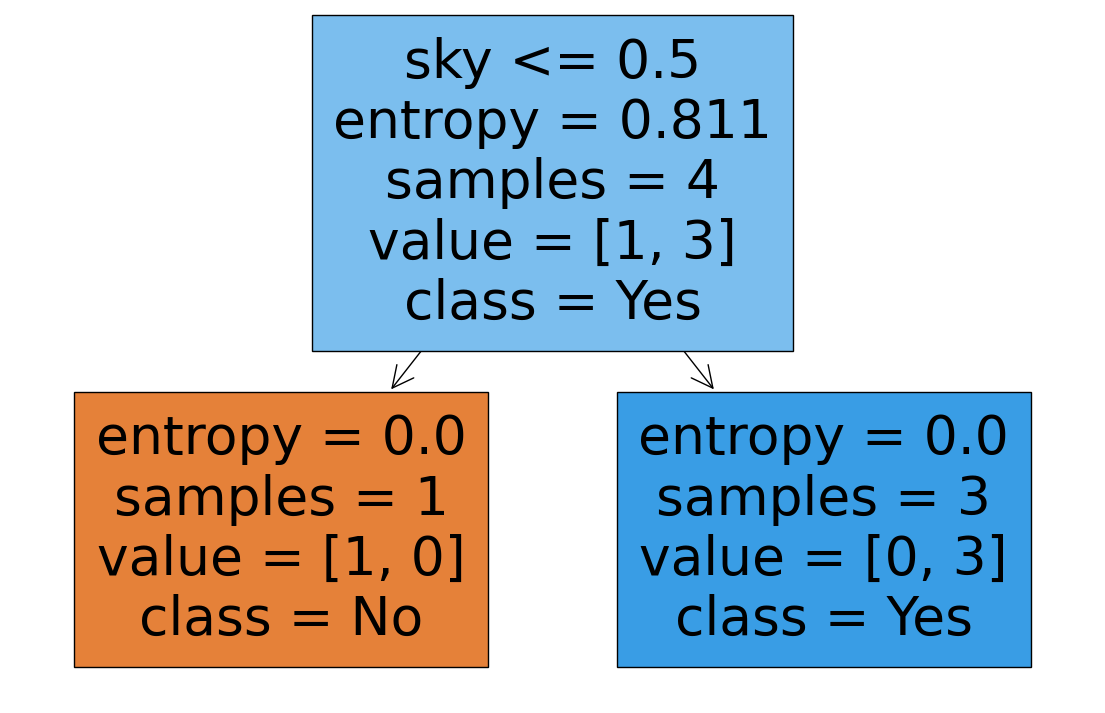

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

df = pd.read_csv('enjoysport.csv')

print("Loaded Data:\n", df)

label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop("enjoysport", axis=1)
y = df["enjoysport"]

clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X, y)

plt.figure(figsize=(14,9))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


In [ ]:
#QUESTION 3

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [ ]:
#Question 4

In [ ]:

from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)


Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
